# Pandemic! Control a Pandemic Disease before it Runs Rampant
_[Mini-workshop@SC22] November 13, 2022_ <br>
Reference Site: https://hackhpc.github.io/StudentHackatSC22/

A SIR model is an epidemiological model that computes the theoretical number of people infected with a contagious illness in a closed population over time. The name of this class of models derives from the fact that they involve coupled equations relating the number of susceptible people S(t), number of people infected I(t), and number of people who have recovered R(t).<br> 

<img src="images/SIR-model.png" style="border: solid 2px black;"></img>

In this model, we've introduced 2 object classes, the Person Object, and the Population Object - essentially a collection of People. <br>

We will use a simple model where a person can be:
- susceptible: they are healthy, but can be infected;
- sick: when they are sick, they can infect other people;
- recovered: they have been sick, but no longer carry the disease, and can not be infected for a
second time;
- vaccinated: they are healthy, do not carry the disease, and can not be infected

There will be a patient zero.<br><br>
Some assumptions:
- When a Person interacts with a Person with the status of "sick", that Person then has a 10% chance of becoming sick themselves.
- Each Person interacts with the same constant number of people
- A Person stays sick for 5 days
- Once a Persons recovers, they become innoculated


### Person object parameters:

#### &#128100; Joe:
##### has a state: Suceptable, Infected, Recovered
##### has number of days sick &#129319;
##### chance of being sick


In [2]:
import numpy as np
import random

my_array = np.array

In [3]:
class Person(object):
    def __init__(self):
        self.status = "Susceptible"
        self.days_sick = 0
        self.sickness_rate = 10
        self.Interaction = []
        self.masked = False
        
    def maskUp(self, wears_mask):
        if (wears_mask):
            self.set_sickness_rate(self.sickness_rate/2)
            self.masked = True
    
    def set_sickness_rate(self, new_rate):
        self.sickness_rate = new_rate
    
    def infect(self, number_of_days_sick):
        self.status = "Infected"
        self.days_sick = number_of_days_sick
    
    def recover(self):
        self.status = "Recovered"
        self.days_sick = 0
    
    def update(self):
        if (self.status == "Susceptible"):
            self.roll_for_infection()
            
        elif (self.status == "Infected"):            
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
    
    def update_days_sick(self):
        if (self.status == "Infected"):            
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
            

            
    def roll_for_infection(self):
        is_sick = (random.randint(0,101) < self.sickness_rate)
        if (is_sick):
            self.infect(4)
            
        

Let's implement our object,  </br>
start w/ instantiating Joe as a Person and Jane as a Person

In [4]:
Joe = Person()
Jane = Person()
Jane.set_sickness_rate(10) #jane has a different sickness rate, joe has the default

day = 0

while (Joe.status != "Recovered" or Jane.status != "Recovered"):
    day = day + 1        
    Joe.update()
    if (Joe.status == "Infected" or Jane.status == "Infected"):
        Jane.update()
        
        
    print("Joe is " + Joe.status + " day:" + str(day))
    print("Jane is " + Jane.status + " day:" + str(day))
    
    #My conditions didn't happen, let's rerun
    #if Joe is recovered and Jane is still susceptable, the condtions for our program weren't met
    #run it again!
    if (Joe.status == "Recovered" and Jane.status == "Susceptible"):
        Joe.status = "Susceptible"
        day = 0
        print()
        print ("------- reset -------")


Joe is Susceptible day:1
Jane is Susceptible day:1
Joe is Susceptible day:2
Jane is Susceptible day:2
Joe is Susceptible day:3
Jane is Susceptible day:3
Joe is Susceptible day:4
Jane is Susceptible day:4
Joe is Susceptible day:5
Jane is Susceptible day:5
Joe is Susceptible day:6
Jane is Susceptible day:6
Joe is Susceptible day:7
Jane is Susceptible day:7
Joe is Susceptible day:8
Jane is Susceptible day:8
Joe is Infected day:9
Jane is Susceptible day:9
Joe is Infected day:10
Jane is Susceptible day:10
Joe is Infected day:11
Jane is Susceptible day:11
Joe is Infected day:12
Jane is Susceptible day:12
Joe is Recovered day:13
Jane is Susceptible day:13

------- reset -------
Joe is Susceptible day:1
Jane is Susceptible day:1
Joe is Susceptible day:2
Jane is Susceptible day:2
Joe is Susceptible day:3
Jane is Susceptible day:3
Joe is Susceptible day:4
Jane is Susceptible day:4
Joe is Susceptible day:5
Jane is Susceptible day:5
Joe is Infected day:6
Jane is Susceptible day:6
Joe is Infected d

#### &#128101; Now, we're going to create a population of 100 Persons


In [5]:
my_population = []
n = 101
for i in range(0,n):
    generic_dude = Person()
    my_population.append(generic_dude) # we now have a population of 100 people
    

In [6]:
print (type(my_population))

<class 'list'>


In [7]:
print (len(my_population))

101


In [8]:
print (type(my_population[99]))

<class '__main__.Person'>


In [9]:
my_population[99].infect(10) # Let's see if our code works
print (my_population[99].status)

Infected


### Let see if we can figure out a way for Persons to interact

In [10]:
interactions = []
index = -1
for p in my_population:
    p_interactions = []
    for i in range(0,10):
        r = random.randint(0,100)
        p_interactions.append(r)
    interactions.append(p_interactions)

for i in interactions:
    index = index + 1
    print ("Person:", index, " interacted with:", i)

Person: 0  interacted with: [45, 24, 16, 37, 56, 70, 64, 51, 34, 6]
Person: 1  interacted with: [49, 56, 76, 78, 78, 32, 6, 53, 53, 91]
Person: 2  interacted with: [9, 15, 44, 55, 49, 16, 84, 90, 73, 94]
Person: 3  interacted with: [91, 1, 98, 81, 63, 61, 14, 98, 28, 25]
Person: 4  interacted with: [46, 45, 37, 60, 32, 87, 10, 73, 94, 38]
Person: 5  interacted with: [60, 37, 63, 0, 19, 30, 16, 42, 35, 6]
Person: 6  interacted with: [41, 21, 19, 50, 21, 81, 31, 99, 82, 17]
Person: 7  interacted with: [69, 56, 30, 39, 66, 30, 67, 63, 60, 94]
Person: 8  interacted with: [25, 22, 61, 30, 15, 66, 90, 2, 46, 80]
Person: 9  interacted with: [35, 54, 16, 72, 72, 58, 94, 11, 79, 25]
Person: 10  interacted with: [89, 42, 78, 89, 41, 76, 36, 72, 2, 32]
Person: 11  interacted with: [14, 8, 71, 30, 2, 94, 25, 46, 20, 91]
Person: 12  interacted with: [89, 65, 6, 23, 85, 98, 54, 61, 28, 18]
Person: 13  interacted with: [88, 0, 4, 36, 92, 57, 74, 39, 63, 100]
Person: 14  interacted with: [48, 42, 59, 

Randomly Infect 10 people
print out the number of people who are sick at the beginning of day 1

We're going to simulate Day 1
If anyone interacts with these 10 people, they must roll a die to see if they get sick

meaning, every sick person that shows up in someones interaction list, that someone rolls to see if they get sick or not.

Also, *every* person who shows up in a sick persons interaction list, has to roll to see if they get sick or not.

Print out the number of people sick after day 1

In [11]:
#first thing: infect 10 people

#print out the number of people who are sick

#look at their interaction lists

#If anyone interacts with them, see if they get sick




In [ ]:
# We're selecting 10 indexes of people we're going to infect
currently_infected = random.sample(range(100), 10)

for i in currently_infected:
    my_population[i].infect(5)


print ("Day 1, number of people sick:" + str(len(currently_infected)))
print (currently_infected)

interactions = []
person_index = -1
for p in my_population:
    person_index = person_index + 1

    # if person_index is in the currently_sick list, everyone they interact w/ can get sick
    
    p_interactions = []
    for i in range(0,10):        
        r = random.randint(0,99)
        p_interactions.append(r)

        #If person_index is already sick, everyone they contact, might also get sick
        
        if (person_index in currently_infected):
            my_population[r].update()
            if (my_population[r].status == "Infected" and r not in currently_infected):
                currently_infected.append(r)
        #If anyone has an infected person in their interactions list, *they* might get infected
        if (r in currently_infected):
            my_population[person_index].update()
            if (my_population[person_index].status == "Infected" and person_index not in currently_infected):
                currently_infected.append(person_index)
    interactions.append(p_interactions)
        
        
# person_index = -1
# for i in interactions:
#     person_index = person_index + 1
#     print ("Person:", person_index, " interacted with:", i)

print ("End of Day 1, number of people sick:", len(currently_infected))
print (currently_infected)

## We need "something" to manage and hold our People

In [12]:
class Population:
    def __init__(self, number=100, interaction=10, percentage_masked=0):
        self.People = []
        self.number = number
        self.interaction = interaction
        self.percentage_masked = percentage_masked
        
        if (number < 100):
            self.number = 100
        
        if (interaction < 10):
            self.interaction = 10
        
        ##build our population
        patient_Zero = Person()
        patient_Zero.infect(5)
        
        self.People.append(patient_Zero)
        
        for i in range(0,number):
            p = Person()
            if (i < number*(self.percentage_masked/100.0) and self.percentage_masked>0):
                p.maskUp(True)
                
            self.People.append(p)

               
            
    def number_of_sick(self):
        sick_Count = 0
        for j in self.People:
            if (j.status == "Infected"):
                sick_Count = sick_Count + 1
                
        return sick_Count
    
    def number_of_recovered(self):
        recovered_Count = 0
        for j in self.People:
            if (j.status == "Recovered"):
                recovered_Count = recovered_Count + 1
        
        return recovered_Count
    
    def number_of_susceptible(self):
        susceptible_Count = 0
        for j in self.People:
            if (j.status == "Susceptible"):
                susceptible_Count = susceptible_Count + 1
                
        return susceptible_Count
    
    def number_masked(self):
        masked_Count = 0
        for j in self.People:
            if (j.masked):
                masked_Count = masked_Count + 1
        
        return masked_Count
    
    def number_masked_sick(self):
        masked_SickCount = 0
        for j in self.People:
            if (j.masked and j.status == "Infected"):
                masked_SickCount = masked_SickCount + 1
        
        return masked_SickCount
    
    ## Here's the brains of the Population class (and our code)
    ## the update will be ran everyday (meaning, every iteration of our while loop)
    ## build interaction tables (who interacted with whom)
    ## if marked sick they must roll to see if (one per interaction)
    ## if I interacted with 10 people, each of them must roll and vice versa if they
    ## they were marked as infected
    def update(self):
        ## people who are might get sick
        might_Get_Sick = []
        
        for person in self.People:
            
            #clear out your interactions per day
            person.Interaction = []
            
            ##These are the n number of people that you interact with
            for i in range(0, self.interaction):
                r = random.randint(0,self.number)
                person.Interaction.append(r)
                
            ##if "person" is Infected, every single person they interacted with might get sick
            if (person.status == "Infected"):
                person.update_days_sick()
                
                for m in person.Interaction:
                    if (self.People[m].status == "Susceptible"): #only susceptible people can get sick
                        might_Get_Sick.append(self.People[m])
            
            ##if "person" is susceptible and they interact w/ someone who is "infected" 
            ##person gets added to the "might get sick"
            if (person.status == "Susceptible"):
                for m in person.Interaction:
                    if (self.People[m].status == "Infected"):
                        might_Get_Sick.append(person)
            
        ##Now! We're going to roll through our "Might Get Sick" and they each roll a die
        ##this is only a list of susceptible people
        for p in might_Get_Sick:
            p.roll_for_infection()
        

## Lets build a population
Build a population of 1000 with 10 initally infected people:
`myCommunity = Population(1000,10)`

In [22]:
# Population( size_of_population, number_of_interactions, percentage_wearing_masks)
myCommunity = Population(40000,5,80)
day = 0
my_plot = []
number_sick = myCommunity.number_of_sick()
while (number_sick > 0):
    number_sick = myCommunity.number_of_sick()
    number_recovered = myCommunity.number_of_recovered()
    number_masked = myCommunity.number_masked()
    number_masked_sick = myCommunity.number_masked_sick()
    
    my_plot.append([day, number_sick, number_recovered])
    
    if (myCommunity.percentage_masked > 0):
        print ("day:", day, "Number of sick:", number_sick, "Sick Mask Wearers:", number_masked_sick, "Mask Wearers:", number_masked)
    else:
        print ("day:", day, "Number of sick:", number_sick)
    
    day = day+1
    myCommunity.update()

#print ("day:", day, "Number of sick:", myCommunity.number_of_sick())
print ("Number recovered:", myCommunity.number_of_recovered())
print ("Number susceptible:", myCommunity.number_of_susceptible())

#print (my_plot)

day: 0 Number of sick: 1 Sick Mask Wearers: 0 Mask Wearers: 32000
day: 1 Number of sick: 3 Sick Mask Wearers: 1 Mask Wearers: 32000
day: 2 Number of sick: 5 Sick Mask Wearers: 1 Mask Wearers: 32000
day: 3 Number of sick: 13 Sick Mask Wearers: 6 Mask Wearers: 32000
day: 4 Number of sick: 30 Sick Mask Wearers: 19 Mask Wearers: 32000
day: 5 Number of sick: 50 Sick Mask Wearers: 32 Mask Wearers: 32000
day: 6 Number of sick: 113 Sick Mask Wearers: 76 Mask Wearers: 32000
day: 7 Number of sick: 229 Sick Mask Wearers: 148 Mask Wearers: 32000
day: 8 Number of sick: 497 Sick Mask Wearers: 325 Mask Wearers: 32000
day: 9 Number of sick: 1069 Sick Mask Wearers: 721 Mask Wearers: 32000
day: 10 Number of sick: 2265 Sick Mask Wearers: 1552 Mask Wearers: 32000
day: 11 Number of sick: 4482 Sick Mask Wearers: 3109 Mask Wearers: 32000
day: 12 Number of sick: 8446 Sick Mask Wearers: 5869 Mask Wearers: 32000
day: 13 Number of sick: 14355 Sick Mask Wearers: 10204 Mask Wearers: 32000
day: 14 Number of sick: 2

# &#128202; Plot your results

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.DataFrame(my_plot, columns=['day','number_sick', 'number_recovered'])

In [24]:
df

,day,number_sick,number_recovered
0,0,1,0
1,1,3,0
2,2,5,0
3,3,13,0
4,4,30,0
5,5,50,3
6,6,113,5
7,7,229,13
8,8,497,30
9,9,1069,53


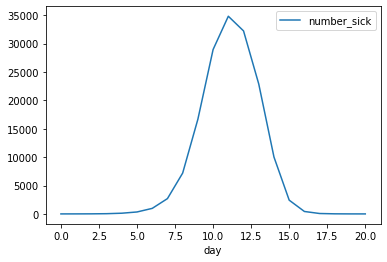

In [18]:
fig = plt.figure()
ax = plt.gca()
fig = df.plot(kind='line', x='day', y='number_sick', ax=ax).get_figure()
plt.savefig('test.png', bbox_inches='tight')
plt.show()

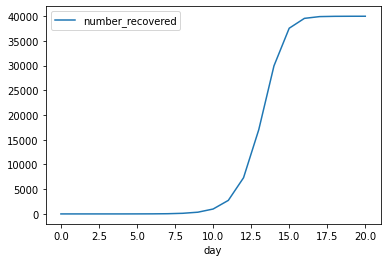

In [19]:
fig = plt.figure()
ax = plt.gca()
fig = df.plot(kind='line', x='day', y='number_recovered', ax=ax).get_figure()
plt.savefig('test.png', bbox_inches='tight')
plt.show()

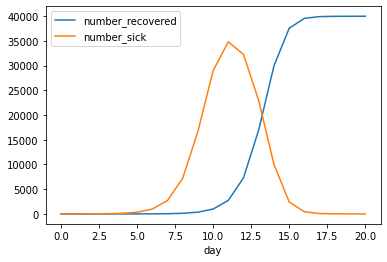

In [20]:
fig = plt.figure()
ax1 = plt.gca()
fig1 = df.plot(kind='line', x='day', y='number_recovered', ax=ax1).get_figure()
fig2 = df.plot(kind='line', x='day', y='number_sick', ax=ax1).get_figure()
plt.savefig('test.png')
plt.show()

In [21]:
df.to_csv("mydata.csv")

# Adding an "Intervention": Incorporating Mask Wearing

Ref: Mask Effectiveness: https://www.cdc.gov/mmwr/volumes/71/wr/mm7106e1.htm 

Modify the `myCommunity = Population(40000,5,0)` decleration.

_Syntax:_

```Population( size_of_population, number_of_interactions, percentage_wearing_masks)```


---
<img src="images/Covid-SEIR-model.png" style="border: solid 2px black;"></img>

<h1 style="color: purple;">&#127942; SC22 Mini-Workshop Challenge</h1>

Your challenge is to add interventions to the code based on the population and availability of ICU beds in Texarkana, TX so that critical care is never overwhlemed. You will need to find or designate a Critical Care Rate of no less than 25% without a vaccine.

**Suggested interventions:**
- &#128567; Masks 
- &#128137; Vaccinations  
- &#128694; Social Distancing 

<h2 style="color:Green"> Texarkana Specific References:</h2>

Ref: Individual Hospital Statistics for Texas: https://www.ahd.com/states/hospital_TX.html

&#128657; **Texarkana, TX Hospital Beds:**

 - CHRISTUS Saint Michael Hospital - 275 Total Beds / Special Care - 40
 - Wadley Regional Medical Center - 185 Total Beds / Special Care - 26
 
 **&#128719; Total 66 ICU Beds**


 ### CDC References:
 - Example Hospitalization Rates Pre-Vaccine: https://www.cdc.gov/mmwr/volumes/69/wr/mm6915e3.htm
 - Death Rates between Vaccinated and Unvaccinated: https://www.cdc.gov/mmwr/volumes/71/wr/mm7104e2.htm#T1_down 
 - Mask Effectiveness: https://www.cdc.gov/mmwr/volumes/71/wr/mm7106e1.htm
 



